In [213]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [214]:
data_raw = pd.read_csv('data_clean.csv')
data_raw.columns


data_raw = data_raw.drop(['Unnamed: 0'], axis=1)

# remove for validation
data_clean = data_raw[data_raw['Health Status'] != "for validation"]
data_clean=data_clean.reset_index(drop=True)
data_clean.columns

Index(['phcaseno', 'Sex', 'Age', 'Nationality', 'Residence in the Philippines',
       'History of Travel / Exposure', 'Travel History', 'Epi_Link',
       'Date of Onset of Symptoms', 'Date of Admission',
       ...
       'Epi_Link_Exposure', 'disease_len_days', 'geo_address', 'address',
       'Travel History Binary', 'region_inc',
       'average income (in thousand pesos)', 'city', 'region',
       'Population Density'],
      dtype='object', length=118)

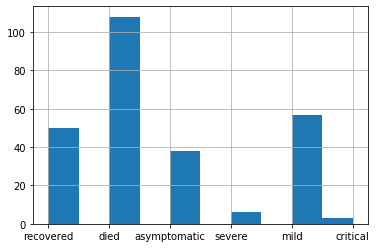

In [215]:
data_clean['Health Status'].hist()

In [216]:
# Sex -  M/F:
data_clean['Sex'] = pd.get_dummies(data_clean['Sex'])
data_clean['Sex'].value_counts() 

0    179
1     83
Name: Sex, dtype: int64

In [217]:
def nationality_recode(series):
    if series != 'filipino':
        return 'other'
    else: 
        return 'filipino'

data_clean['Nationality'] = data_clean['Nationality'].apply(nationality_recode)
data_clean['Nationality'] = pd.get_dummies(data_clean['Nationality'])
data_clean['Nationality'].value_counts() 

1    241
0     21
Name: Nationality, dtype: int64

In [218]:
data_clean['Population Density'] = data_clean.loc[:,'Population Density'].str.replace(',', '').astype(float)

In [219]:
data_clean.columns.tolist()

['phcaseno',
 'Sex',
 'Age',
 'Nationality',
 'Residence in the Philippines',
 'History of Travel / Exposure',
 'Travel History',
 'Epi_Link',
 'Date of Onset of Symptoms',
 'Date of Admission',
 'Date of Lab Confirmation',
 'Date of Announcement to the Public',
 'Admission / Consultation',
 'Symptoms',
 'other_disease',
 'Status',
 'Health Status',
 'Date of Final Status (recovered/expired)',
 'Final Diagnosis',
 'Age Group',
 'Location',
 'Location 1',
 'Location 2',
 'Latitude',
 'Longitude',
 'Residence Lat',
 'Residence Long',
 'symp_ body malaise',
 'symp_ colds',
 'symp_ comorbidity',
 'symp_ cough',
 'symp_ difficulty in breathing',
 'symp_ dizziness',
 'symp_ dysphagia',
 'symp_ headache',
 'symp_ shortness of breath',
 'symp_ sore throat',
 'symp_asymptomatic',
 'symp_cough',
 'symp_difficulty of breathing',
 'symp_dyspnea',
 'symp_fever',
 'symp_sore throat',
 'dis_  diabetes',
 'dis_  renal disease',
 'dis_ acute kidney injury',
 'dis_ asthma',
 'dis_ atherosclerosis',
 'di

In [220]:
data_clean=data_clean.drop(['phcaseno', 'History of Travel / Exposure', 'Travel History', 'Epi_Link', 'Date of Admission', 'Date of Lab Confirmation', 'Date of Admission', 'Symptoms', 'other_disease', 'Status', 'Date of Final Status (recovered/expired)', 'Final Diagnosis', 'Age Group', 'Location', 'Location 1', 'Location 2', 'Latitude', 'Longitude', 'Residence Lat', 'Residence Long', 'disease_len_days'], axis=1)

In [221]:
data_clean.columns.tolist()

['Sex',
 'Age',
 'Nationality',
 'Residence in the Philippines',
 'Date of Onset of Symptoms',
 'Date of Announcement to the Public',
 'Admission / Consultation',
 'Health Status',
 'symp_ body malaise',
 'symp_ colds',
 'symp_ comorbidity',
 'symp_ cough',
 'symp_ difficulty in breathing',
 'symp_ dizziness',
 'symp_ dysphagia',
 'symp_ headache',
 'symp_ shortness of breath',
 'symp_ sore throat',
 'symp_asymptomatic',
 'symp_cough',
 'symp_difficulty of breathing',
 'symp_dyspnea',
 'symp_fever',
 'symp_sore throat',
 'dis_  diabetes',
 'dis_  renal disease',
 'dis_ acute kidney injury',
 'dis_ asthma',
 'dis_ atherosclerosis',
 'dis_ atherosclerotic cardiovascular disease',
 'dis_ benign prostatic hyperplasia',
 'dis_ benign prostatic hypertrophy',
 'dis_ bronchial asthma',
 'dis_ cardiac disease',
 'dis_ cardiac dysrhythmia',
 'dis_ cardiomyopathy',
 'dis_ cardiovascular disease',
 'dis_ cerebrovascular accident infarc',
 'dis_ cerebrovascular disease infarction',
 'dis_ chronic k

In [222]:
data_clean.head()

,Sex,Age,Nationality,Residence in the Philippines,Date of Onset of Symptoms,Date of Announcement to the Public,Admission / Consultation,Health Status,symp_ body malaise,symp_ colds,...,dis_with comorbid (not specified),Epi_Link_Exposure,geo_address,address,Travel History Binary,region_inc,average income (in thousand pesos),city,region,Population Density
0,1,38,0,None,2020-01-21 00:00:00-05:00,2020-01-30 00:00:00-05:00,san lazaro hospital,recovered,0.0,0.0,...,0.0,1,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila,71263.0
1,0,44,0,None,2020-01-18 00:00:00-05:00,2020-02-02 00:00:00-05:00,san lazaro hospital,died,0.0,0.0,...,0.0,1,"{'hospital': 'San Lazaro Hospital', 'road': 'Q...","San Lazaro Hospital, Quiricada Street, Baranga...",1,NCR,460,Manila,Metro Manila,71263.0
2,1,60,0,None,2020-01-21 00:00:00-05:00,2020-02-05 00:00:00-05:00,ace medical center,recovered,0.0,0.0,...,0.0,0,"{'public_building': 'Francisco Duque Hall', 'r...","Francisco Duque Hall, Tayuman Street, Santa Cr...",1,NCR,460,Manila,Metro Manila,71263.0
3,0,48,1,Taguig City,2020-03-03 00:00:00-05:00,2020-03-06 00:00:00-05:00,university of the east ramon magsaysay memoria...,recovered,0.0,0.0,...,0.0,1,{'hospital': 'University of the East - Ramon M...,University of the East - Ramon Magsaysay Memor...,1,NCR,460,Galas,Metro Manila,20785.0
4,0,62,1,"Cainta, Rizal",2020-02-25 00:00:00-05:00,2020-03-06 00:00:00-05:00,research institute for tropical medicine,died,0.0,0.0,...,0.0,1,{'hospital': 'Research Institute for Tropical ...,"Research Institute for Tropical Medicine, Corp...",0,NCR,460,Muntinlupa,Metro Manila,12692.0


In [223]:
for i in data_clean.select_dtypes(exclude='number').columns:
    unique_vals=data_clean[i].nunique()
    print(i,  ": ", unique_vals)

Residence in the Philippines :  55
Date of Onset of Symptoms :  41
Date of Announcement to the Public :  30
Admission / Consultation :  54
Health Status :  6
geo_address :  47
address :  46
region_inc :  8
city :  25
region :  8


In [224]:
data_clean['Health Status'].unique()

array(['recovered', 'died', 'asymptomatic', 'severe', 'mild', 'critical'],
      dtype=object)

In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
from math import floor

warnings.filterwarnings('ignore')

In [226]:
def status_to_numeric(x):
    if x=='died':
        return 5
    if x=='critical':
        return 4
    if x=='severe':
        return 3
    if x=='mild':
        return 2
    if x=='asymptomatic':
        return 1
    if x=='recovered':
        return 0
    

data_clean['HealthStatusNUM'] = data_clean['Health Status'].apply(status_to_numeric)

In [227]:
# split data using dates into train, val, test using most recent dates for test:
train_pct, val_pct, test_pct = 0.6, 0.2, 0.2
train_num, val_num, test_num = floor(data_clean.shape[0]*train_pct), floor(data_clean.shape[0]*val_pct), floor(data_clean.shape[0]*test_pct)

train = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[:train_num,:]
train=train.reset_index(drop=True)

val = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[train_num:train_num+val_num,:]
val=val.reset_index(drop=True)

test = data_clean.sort_values('Date of Onset of Symptoms', ascending=True).iloc[train_num+val_num:train_num+val_num+test_num+1,:]
test=test.reset_index(drop=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bb5ff90>]],
      dtype=object)

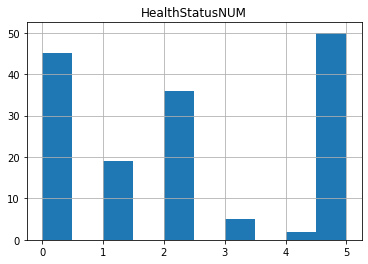

In [228]:
train.hist(column='HealthStatusNUM')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119b79150>]],
      dtype=object)

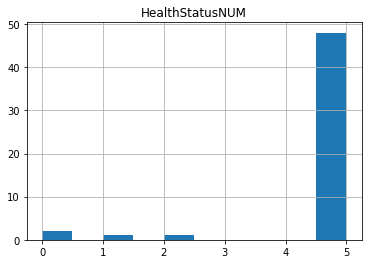

In [229]:
val.hist(column='HealthStatusNUM')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bd14950>]],
      dtype=object)

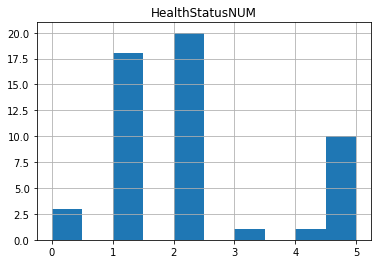

In [230]:
test.hist(column='HealthStatusNUM')

In [231]:
 train, val, test = np.split(data_clean.sample(frac=1), [int(.6*len(data_clean)), int(.8*len(data_clean))])

In [232]:
train=train.reset_index(drop=True)
val=val.reset_index(drop=True)
test=test.reset_index(drop=True)

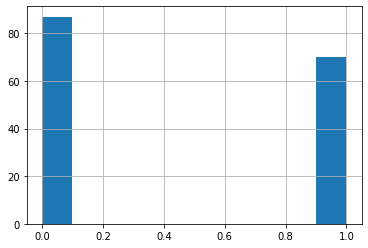

In [233]:

def health_status_binary(series):
    if series > 2:
        return 1
    else:
        return 0
    
train['Health Status Binary'] = train['HealthStatusNUM'].apply(health_status_binary)
val['Health Status Binary'] = val['HealthStatusNUM'].apply(health_status_binary)
test['Health Status Binary'] = test['HealthStatusNUM'].apply(health_status_binary)

train['Health Status Binary'].hist()

In [234]:
from sklearn import metrics

In [235]:
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer


imp = SimpleImputer(strategy="mean")
standardize = preprocessing.StandardScaler()
cols_drop = ['Health Status Binary','HealthStatusNUM', 'Health Status', 'Date of Onset of Symptoms']

X_train, y_train = train.drop(cols_drop, axis=1), train['Health Status Binary']
X_val, y_val = val.drop(cols_drop, axis=1), val['Health Status Binary']
X_test, y_test = test.drop(cols_drop, axis=1), test['Health Status Binary']

X_train = X_train.select_dtypes(include=['float', 'int64'])
X_val = X_val.select_dtypes(include=['float', 'int64'])
X_test = X_test.select_dtypes(include=['float', 'int64'])

X_train = standardize.fit_transform(imp.fit_transform(X_train))
X_val = standardize.fit_transform(imp.fit_transform(X_val))
X_test = standardize.fit_transform(imp.fit_transform(X_test))

Decision Tree

In [236]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_val) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_val, dtree_predictions)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_val, dtree_predictions))
dtree_model.score(X_val,  y_val)

[[24  5]
 [ 7 16]]
Accuracy: 0.7692307692307693


0.7692307692307693

In [238]:
feature_importance = dtree_model.feature_importances_
print(np.count_nonzero(feature_importance))

6


In [240]:
important_features = np.argsort(feature_importance)
important_features = important_features[-(np.count_nonzero(feature_importance)+1):]
important_features

array([82, 19, 69, 72, 85,  0, 70])

Subsetting after only using important_features

In [242]:
imp = SimpleImputer(strategy="mean")
standardize = preprocessing.StandardScaler()
cols_drop = ['Health Status Binary']

train=train.iloc[:,np.append(important_features, 99)]
val=val.iloc[:,np.append(important_features, 99)]
test=test.iloc[:,np.append(important_features, 99)]

X_train, y_train = train.drop(cols_drop, axis=1), train['Health Status Binary']
X_val, y_val = val.drop(cols_drop, axis=1), val['Health Status Binary']
X_test, y_test = test.drop(cols_drop, axis=1), test['Health Status Binary']

X_train = X_train.select_dtypes(include=['float', 'int64'])
X_val = X_val.select_dtypes(include=['float', 'int64'])
X_test = X_test.select_dtypes(include=['float', 'int64'])

X_train = standardize.fit_transform(imp.fit_transform(X_train))
X_val = standardize.fit_transform(imp.fit_transform(X_val))
X_test = standardize.fit_transform(imp.fit_transform(X_test))

Naive Bayes

In [244]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_val)

In [245]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

cm = metrics.confusion_matrix(y_val, y_pred)
cm

Accuracy: 0.4230769230769231


array([[ 0, 29],
       [ 1, 22]])

Random Forest

In [246]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0) 
clf.fit(X_train, y_train)
rf_preds = clf.predict(X_val)
cm = confusion_matrix(y_val, rf_preds)
print(cm)
clf.score(X_val,  y_val)

[[29  0]
 [23  0]]


0.5576923076923077

XGBoost

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_val)
cm = confusion_matrix(y_val, y_preds)
print(cm)
model.score(X_val,  y_val)

[[29  0]
 [23  0]]


0.5576923076923077

SVM

In [179]:
# SVM: 

# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_val) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_val, y_val) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_val, svm_predictions) 
cm

print(accuracy)
# choose logreg

0.5192307692307693


LogReg

In [180]:

# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.52


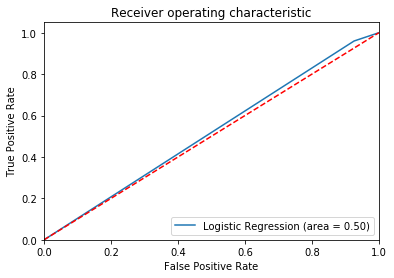

In [181]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_val, logreg.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")